In [182]:
# dependencies
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
from scipy.stats import linregress

#import api key
from config import weather_api_key

#import citipy
from citipy import citipy

In [183]:
# Set up lists to hold response info
cities = []
lat_lngs = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [184]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Confirm sufficient city count
len(cities)

622

In [185]:
units = 'imperial'
# build query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

In [186]:
# create arrays to be appended
city_data = []
temp = []
hum = []
cloud = []
wind = []
lat = []
lon = []

count = 0

for city in cities:
    json_response = requests.get(query_url + city).json()
    try:
        city_data.append(json_response['name'])
        temp.append(json_response['main']['temp_max'])
        hum.append(json_response['main']['humidity'])
        cloud.append(json_response['clouds']['all'])
        wind.append(json_response['wind']['speed'])
        lat.append(json_response['coord']['lat'])
        lon.append(json_response['coord']['lon'])
        count +=1
        print(f"{count}: Appending weather data for {city}")
                
    except KeyError:
        print(f"----Records not found for {city}----")

print("------------------------------")        
print("All cities have been processed")


1: Appending weather data for oktyabrskiy
2: Appending weather data for pangnirtung
3: Appending weather data for shenjiamen
4: Appending weather data for sisimiut
5: Appending weather data for caravelas
6: Appending weather data for xichang
7: Appending weather data for rio grande
8: Appending weather data for rikitea
9: Appending weather data for dikson
10: Appending weather data for mlimba
----Records not found for taolanaro----
11: Appending weather data for tuktoyaktuk
12: Appending weather data for fairbanks
13: Appending weather data for qaanaaq
14: Appending weather data for punta arenas
15: Appending weather data for portland
----Records not found for illoqqortoormiut----
16: Appending weather data for burnie
17: Appending weather data for georgetown
18: Appending weather data for bluff
----Records not found for nizhneyansk----
19: Appending weather data for grindavik
20: Appending weather data for baoqing
21: Appending weather data for ca mau
22: Appending weather data for al

In [187]:
#import data into a weather data frame
weather_df = pd.DataFrame({"City Name": city_data,
                           "Max Temperature (F)": temp,
                           "Humidity (%)": hum,
                           "Cloudiness (%)": cloud,
                           "Wind Speed (mph)": wind,
                           "Latitude": lat,
                           "Longitude": lon})
weather_df.head()

,City Name,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Oktyabr'skiy,48.15,50,55,6.20,54.4815,53.4710
1,Pangnirtung,32.00,93,75,3.44,66.1451,-65.7125
2,Shenjiamen,62.06,85,7,15.84,29.9576,122.2980
3,Sisimiut,39.42,69,42,5.41,66.9395,-53.6735
4,Caravelas,79.18,67,87,11.68,-17.7125,-39.2481


In [192]:
# create file for city weather data in csv format
weather_df.to_csv("Analysis/WeatherAPI/weather_df.csv", index=False, header=True)

In [193]:
# check data types
weather_df.dtypes

City Name               object
Max Temperature (F)    float64
Humidity (%)             int64
Cloudiness (%)           int64
Wind Speed (mph)       float64
Latitude               float64
Longitude              float64
dtype: object

In [194]:
# describe data
weather_df.describe()

,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,64.967133,64.826923,52.015734,8.205017,18.650018,17.599402
std,20.187546,23.022104,37.098649,5.432255,32.490944,87.912552
min,-2.360000,3.000000,0.000000,0.400000,-54.800000,-179.166700
25%,51.800000,49.750000,19.000000,4.000000,-6.950125,-59.186425
50%,69.800000,69.000000,55.000000,6.910000,21.572650,20.624050
75%,78.835000,83.000000,89.000000,10.930000,43.745825,96.650025
max,107.220000,100.000000,100.000000,36.820000,78.218600,179.316700


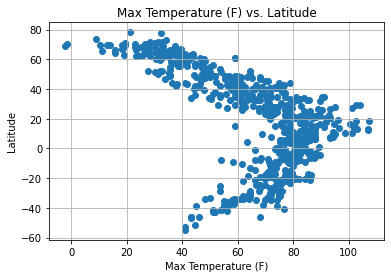

According to the scatterplot, cities that are closer to the equator,
have a higher temperature than cities that are further away from the equator.


In [195]:
#create scatter pluts comparing temp and lat
plt.scatter(weather_df["Max Temperature (F)"], weather_df["Latitude"])
plt.title("Max Temperature (F) vs. Latitude")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/tempvslat.png")

plt.show()
print("According to the scatterplot, cities that are closer to the equator,")
print("have a higher temperature than cities that are further away from the equator.")

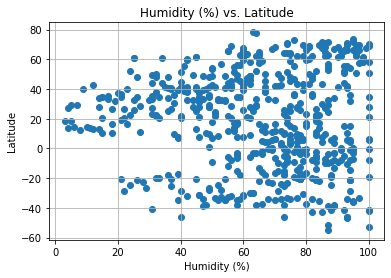

According to the scatterplot, there humidity ranges widely depending on your location.
There is no clear direct relation shown.
There is a stronger cluster of citied with high humidity overall, however they are spread evenly between distances from the equator.
There are fewer cities with humidity below 50%, and they tend to be in the northern hemisphere and are at or below 40 degrees lat.


In [196]:
#create scatter pluts comparing hum vs lat
plt.scatter(weather_df["Humidity (%)"], weather_df["Latitude"])
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/humvslat.png")

plt.show()
print("According to the scatterplot, there humidity ranges widely depending on your location.")
print("There is no clear direct relation shown.")
print("There is a stronger cluster of citied with high humidity overall, however they are spread evenly between distances from the equator.")
print("There are fewer cities with humidity below 50%, and they tend to be in the northern hemisphere and are at or below 40 degrees lat.")

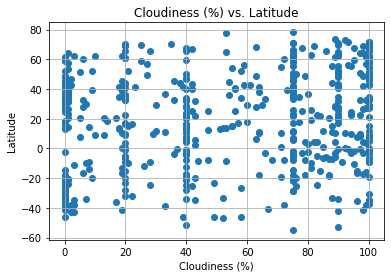

According to the scatterplot, there is no apparent correlation betwen latitude and coudiness.
The distribution is even across all lattitues


In [197]:
#create scatter pluts comparing cloud vs lat
plt.scatter(weather_df["Cloudiness (%)"], weather_df["Latitude"])
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/cloudvslat.png")

plt.show()
print("According to the scatterplot, there is no apparent correlation betwen latitude and coudiness.")
print("The distribution is even across all lattitues")

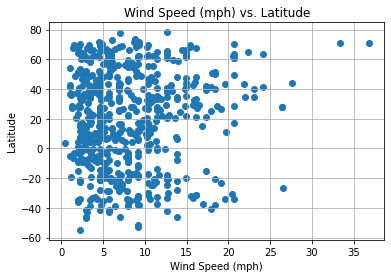

According to the scatterplot, wind speed overall is does not exceed 15 mph for the majority of the cities.
There appears to be a higher cluster of cities in the northeren hemisphere that have wind speeds
between 0 mph and 10 mph when compared to the southern hemisphere as a whole


In [198]:
#create scatter pluts comparing wind speed vs lat
plt.scatter(weather_df["Wind Speed (mph)"], weather_df["Latitude"])
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Analysis/WeatherAPI/windvslat.png")

plt.show()
print("According to the scatterplot, wind speed overall is does not exceed 15 mph for the majority of the cities.")
print("There appears to be a higher cluster of cities in the northeren hemisphere that have wind speeds")
print("between 0 mph and 10 mph when compared to the southern hemisphere as a whole")

In [199]:
# create new df to spilt the n and s hemispheres
northern_df = weather_df.loc[weather_df["Latitude"] >= 0, :]
southern_df = weather_df.loc[weather_df["Latitude"] < 0, :]
northern_df.head()

,City Name,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Oktyabr'skiy,48.15,50,55,6.20,54.4815,53.4710
1,Pangnirtung,32.00,93,75,3.44,66.1451,-65.7125
2,Shenjiamen,62.06,85,7,15.84,29.9576,122.2980
3,Sisimiut,39.42,69,42,5.41,66.9395,-53.6735
5,Xichang,61.54,62,89,2.04,27.8964,102.2634


In [200]:
southern_df.head()

,City Name,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
4,Caravelas,79.18,67,87,11.68,-17.7125,-39.2481
6,Rio Grande,75.20,60,20,9.22,-32.0350,-52.0986
7,Rikitea,78.80,74,49,19.10,-23.1203,-134.9692
9,Mlimba,73.53,90,91,2.64,-8.8000,35.8167
13,Punta Arenas,41.00,100,90,9.22,-53.1500,-70.9167


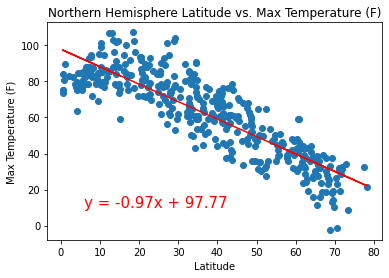

There is a strong correlation between temperature and latitude.  As latitude increases, temperature decreases
This means there is a higher temperature for cities closer to the equator in the northern hemisphere


<Figure size 432x288 with 0 Axes>

In [201]:
# nh- temp v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_temp_v_lat.png")

print("There is a strong correlation between temperature and latitude.  As latitude increases, temperature decreases")
print("This means there is a higher temperature for cities closer to the equator in the northern hemisphere")

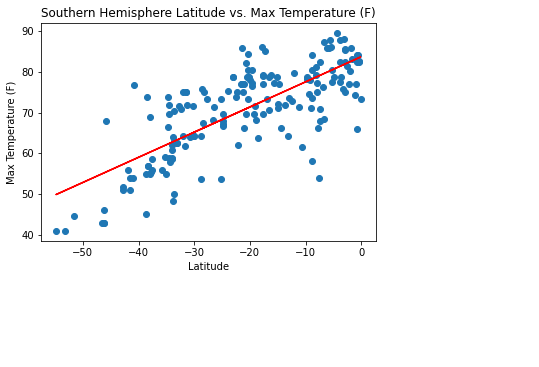

There is a strong correlation between temperature and latitude.  As latitude decreases, temperature decreases as well
This means there is a lowr temperature for cities further away from to the equator in the southern hemisphere.


<Figure size 432x288 with 0 Axes>

In [202]:
# sh- temp v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_temp_v_lat.png")

print("There is a strong correlation between temperature and latitude.  As latitude decreases, temperature decreases as well")
print("This means there is a lowr temperature for cities further away from to the equator in the southern hemisphere.")

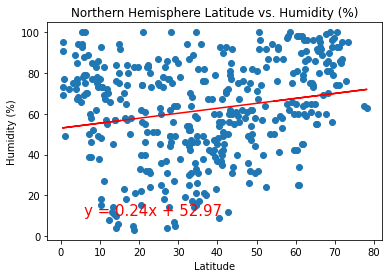

There is a weak correlation between latitude and humidity.  However, cities closer to the equator are more likely to have high humidity.


<Figure size 432x288 with 0 Axes>

In [203]:
# nh- hum v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_hum_v_lat.png")

print("There is a weak correlation between latitude and humidity.  However, cities closer to the equator are more likely to have high humidity.")

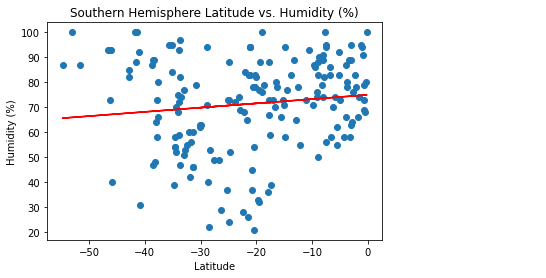

There is a very weak if any correlation between latitude and humidity. However cities that are cloder to the equator are more likely to have high humidity than low.
Cities that are between -30 and -20 latitudes are evenly spread between low and high humidity


<Figure size 432x288 with 0 Axes>

In [204]:
# sh- hum v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_hum_v_lat.png")

print("There is a very weak if any correlation between latitude and humidity. However cities that are cloder to the equator are more likely to have high humidity than low.")
print("Cities that are between -30 and -20 latitudes are evenly spread between low and high humidity")

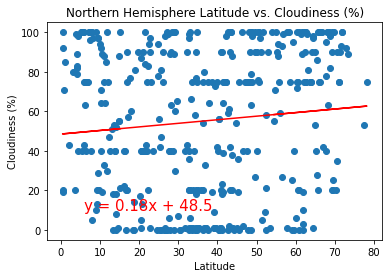

There is no correlation between cloudiness and latitude in the northern hemisphere


<Figure size 432x288 with 0 Axes>

In [205]:
# nh- hum v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_cloud_v_lat.png")

print("There is no correlation between cloudiness and latitude in the northern hemisphere")

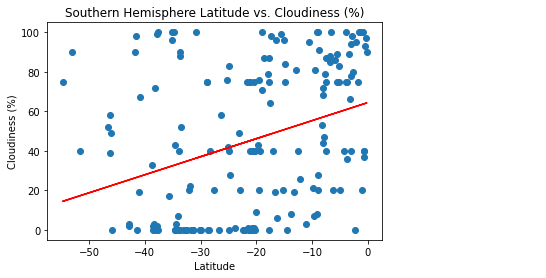

There is no correlation between cloudiness and latitude in the southern hemisphere


<Figure size 432x288 with 0 Axes>

In [206]:
# sh- hum v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_cloud_v_lat.png")

print("There is no correlation between cloudiness and latitude in the southern hemisphere")

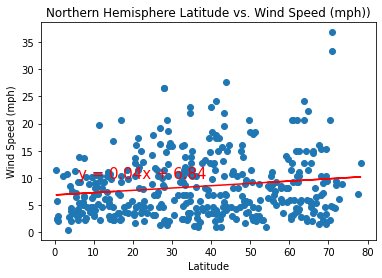

Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.
There is no correlation between wind speed and latitude as the data is evenly distributed in the northern hemisphere.


<Figure size 432x288 with 0 Axes>

In [207]:
# nh- wind v lat
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed (mph))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/nh_wind_v_lat.png")

print("Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.")
print("There is no correlation between wind speed and latitude as the data is evenly distributed in the northern hemisphere.")

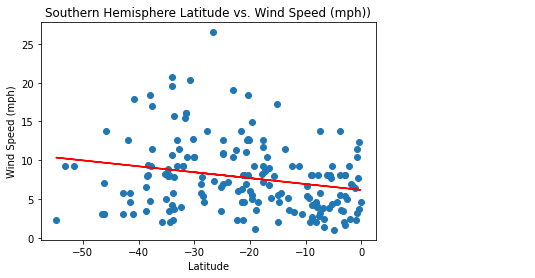

Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.
There is no correlation between wind speed and latitude as the data is evenly distributed in the southern hemisphere.


<Figure size 432x288 with 0 Axes>

In [208]:
# sh- wind v lat
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed (mph))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# save figure
plt.savefig("Analysis/WeatherAPI/sh_wind_v_lat.png")

print("Overall city wind speeds are below 15 mph whether the city is close to the equator or further away.")
print("There is no correlation between wind speed and latitude as the data is evenly distributed in the southern hemisphere.")